First 5 rows:
              Name            Timestamp   Status Description  \
0  Conveyor Belt 4  2025-08-15 00:00:00  Running         NaN   
1  Conveyor Belt 4  2025-08-15 00:15:00  Running         NaN   
2  Conveyor Belt 4  2025-08-15 00:30:00  Running         NaN   
3  Conveyor Belt 4  2025-08-15 00:45:00  Running         NaN   
4  Conveyor Belt 4  2025-08-15 01:00:00  Running         NaN   

   Vibration Frequency  Vibration Amplitude  Bearing Temperature  \
0              1490.82                 0.04               77.130   
1              1498.37                 0.04               77.076   
2              1503.22                 0.06               77.307   
3              1508.11                 0.04               77.474   
4              1498.13                 0.06               77.785   

   Motor Temperature  Belt Load  Torque  Noise Levels  Current and Voltage  \
0             96.902       1.36  318.07         55.12                15.79   
1             96.975       1.07  295

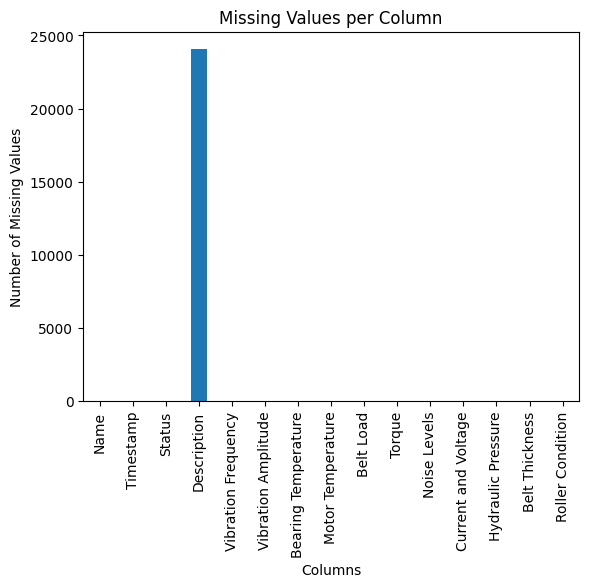

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = 'Belt_Training_Data/Belt 1 9 Months negative data.xlsx'  # Update with your actual file path if needed
df = pd.read_excel(file_path)

test_data = pd.read_excel('Belt_Test_Data/Belt 1 Test Data.xlsx')

# Rename columns to match the training data
test_data.columns = df.columns

# Step 2: Quick overview of the data
print("First 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Check for missing values
missing = df.isnull().sum()
print("\nMissing Values per Column:")
print(missing)

# Visualize missing values
missing.plot(kind='bar', title='Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()




In [83]:
if df['Name'].nunique() == 1:
    print("The 'name' column is constant and will be dropped.")
    df.drop('Name', axis=1, inplace=True)

if test_data['Name'].nunique() == 1:
    print("The 'name' column is constant and will be dropped.")
    test_data.drop('Name', axis=1, inplace=True)

The 'name' column is constant and will be dropped.
The 'name' column is constant and will be dropped.


In [84]:
import pandas as pd
def export_features (data):
    # Convert 'Timestamp' column to datetime, coercing errors into NaT
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

    # Check for any invalid dates that were converted to NaT
    invalid_dates = data[data['Timestamp'].isnull()]
    print("Invalid dates found:\n", invalid_dates)

    # Optionally, drop rows with invalid dates
    data = data.dropna(subset=['Timestamp'])

    # Extract components if needed
    data['year'] = data['Timestamp'].dt.year
    data['month'] = data['Timestamp'].dt.month
    data['day'] = data['Timestamp'].dt.day
    data['hour'] = data['Timestamp'].dt.hour
    data['minute'] = data['Timestamp'].dt.minute
    data['second'] = data['Timestamp'].dt.second

    # Convert to a numeric timestamp if required
    data['timestamp_numeric'] = data['Timestamp'].apply(lambda x: x.timestamp())

    return data

df = export_features(df)
print(df.info())

test_data = export_features(test_data)
print(test_data.info())


Invalid dates found:
       Timestamp   Status Description  Vibration Frequency  \
19008       NaT  Running         NaN              1490.82   
19009       NaT  Running         NaN              1498.37   
19010       NaT  Running         NaN              1503.22   
19011       NaT  Running         NaN              1508.11   
19012       NaT  Running         NaN              1498.13   
...         ...      ...         ...                  ...   
19099       NaT  Running         NaN              1506.74   
19100       NaT  Running         NaN              1502.84   
19101       NaT  Running         NaN              1503.36   
19102       NaT  Running         NaN              1498.34   
19103       NaT  Running         NaN              1495.26   

       Vibration Amplitude  Bearing Temperature  Motor Temperature  Belt Load  \
19008                 0.04               77.130             96.902       1.36   
19009                 0.04               77.076             96.975       1.07   
19

C:\Users\griff\AppData\Local\Temp\ipykernel_86556\664673043.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['Timestamp'].dt.year
C:\Users\griff\AppData\Local\Temp\ipykernel_86556\664673043.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['Timestamp'].dt.month
C:\Users\griff\AppData\Local\Temp\ipykernel_86556\664673043.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [85]:
nat_count = df['Timestamp'].isna().sum()
print("Number of NaT values in 'Timestamp':", nat_count)
df.head()


Number of NaT values in 'Timestamp': 0


,Timestamp,Status,Description,Vibration Frequency,Vibration Amplitude,Bearing Temperature,Motor Temperature,Belt Load,Torque,Noise Levels,...,Hydraulic Pressure,Belt Thickness,Roller Condition,year,month,day,hour,minute,second,timestamp_numeric
0,2025-08-15 00:00:00,Running,NaN,1490.82,0.04,77.130,96.902,1.36,318.07,55.12,...,382.09,1.58000,86.000,2025,8,15,0,0,0,1.755216e+09
1,2025-08-15 00:15:00,Running,NaN,1498.37,0.04,77.076,96.975,1.07,295.50,59.68,...,376.48,1.57950,85.854,2025,8,15,0,15,0,1.755217e+09
2,2025-08-15 00:30:00,Running,NaN,1503.22,0.06,77.307,96.755,1.21,314.38,58.20,...,384.20,1.57925,85.781,2025,8,15,0,30,0,1.755218e+09
3,2025-08-15 00:45:00,Running,NaN,1508.11,0.04,77.474,97.661,1.29,311.84,56.16,...,379.79,1.57900,85.708,2025,8,15,0,45,0,1.755219e+09
4,2025-08-15 01:00:00,Running,NaN,1498.13,0.06,77.785,97.471,1.07,317.14,55.39,...,383.95,1.57875,85.635,2025,8,15,1,0,0,1.755220e+09


In [86]:
# One-Hot Encode the Status column
df = pd.get_dummies(df, columns=['Status'], prefix='status')
test_data = pd.get_dummies(test_data, columns=['Status'], prefix='status')
# add blank status_Down column to test_data
test_data['status_Down'] = False
# print(df.head())


In [87]:
print(df['Vibration Frequency'].describe())

count    26113.000000
mean      1499.178403
std          5.735906
min       1481.680000
25%       1494.400000
50%       1499.180000
75%       1503.540000
max       1522.690000
Name: Vibration Frequency, dtype: float64


In [88]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
test_non_numeric_cols = test_data.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Drop non-numeric columns that are not needed for the model
df_model = df.drop(non_numeric_cols, axis=1)

test_model = test_data.drop(test_non_numeric_cols, axis=1)

# Alternatively, if you only want to keep numeric columns:
# df_model = df.select_dtypes(include=['number'])
df=df_model
test_data = test_model

print("Columns used for modeling:", df_model.columns)
df.head()


Non-numeric columns: Index(['Description'], dtype='object')
Columns used for modeling: Index(['Timestamp', 'Vibration Frequency', 'Vibration Amplitude',
       'Bearing Temperature', 'Motor Temperature', 'Belt Load', 'Torque',
       'Noise Levels', 'Current and Voltage', 'Hydraulic Pressure',
       'Belt Thickness', 'Roller Condition', 'year', 'month', 'day', 'hour',
       'minute', 'second', 'timestamp_numeric', 'status_Down',
       'status_Maintenance', 'status_Running'],
      dtype='object')


,Timestamp,Vibration Frequency,Vibration Amplitude,Bearing Temperature,Motor Temperature,Belt Load,Torque,Noise Levels,Current and Voltage,Hydraulic Pressure,...,year,month,day,hour,minute,second,timestamp_numeric,status_Down,status_Maintenance,status_Running
0,2025-08-15 00:00:00,1490.82,0.04,77.130,96.902,1.36,318.07,55.12,15.79,382.09,...,2025,8,15,0,0,0,1.755216e+09,False,False,True
1,2025-08-15 00:15:00,1498.37,0.04,77.076,96.975,1.07,295.50,59.68,14.34,376.48,...,2025,8,15,0,15,0,1.755217e+09,False,False,True
2,2025-08-15 00:30:00,1503.22,0.06,77.307,96.755,1.21,314.38,58.20,15.03,384.20,...,2025,8,15,0,30,0,1.755218e+09,False,False,True
3,2025-08-15 00:45:00,1508.11,0.04,77.474,97.661,1.29,311.84,56.16,15.43,379.79,...,2025,8,15,0,45,0,1.755219e+09,False,False,True
4,2025-08-15 01:00:00,1498.13,0.06,77.785,97.471,1.07,317.14,55.39,14.35,383.95,...,2025,8,15,1,0,0,1.755220e+09,False,False,True


In [89]:
# print("Sample Predicted Timestamps:", predicted_datetimes[:5])
#


In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assume df is your DataFrame and 'timestamp_numeric' is your target variable.
# Drop columns that are not useful for prediction, e.g., the original Timestamp column.
# Also, drop any constant columns like "name" if you haven't already.
features = df.drop(['Timestamp', 'timestamp_numeric'], axis=1).columns

X = df[features]
y = df['timestamp_numeric']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test_data[features]
y_test = test_data['timestamp_numeric']

# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Convert predicted numeric timestamps back to datetime format if needed
predicted_datetimes = pd.to_datetime(y_pred, unit='s')
print("Sample Predicted Timestamps:", predicted_datetimes[:5])




Mean Absolute Error: 823510.9652294854
Sample Predicted Timestamps: DatetimeIndex(['2026-05-13 15:10:30', '2026-05-13 15:17:33',
               '2026-05-13 15:15:54', '2026-05-13 15:24:18',
               '2026-05-13 15:15:09'],
              dtype='datetime64[ns]', freq=None)


In [91]:
# Convert actual and predicted numeric timestamps to datetime
actual_datetimes = pd.to_datetime(y_test, unit='s')
predicted_datetimes = pd.to_datetime(y_pred, unit='s')

# Create a DataFrame to compare actual vs. predicted timestamps
results_df = pd.DataFrame({'Actual': actual_datetimes, 'Predicted': predicted_datetimes})
print(results_df.head())

               Actual           Predicted
0 2026-05-14 00:30:00 2026-05-13 15:10:30
1 2026-05-14 00:45:00 2026-05-13 15:17:33
2 2026-05-14 01:00:00 2026-05-13 15:15:54
3 2026-05-14 01:15:00 2026-05-13 15:24:18
4 2026-05-14 01:30:00 2026-05-13 15:15:09
